# Titanic Servival Solutions

In [96]:
import pandas as pd
import numpy as np

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Explore and cleansing

In [97]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [99]:
df.shape

(891, 5)

In [114]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [115]:
pd.crosstab([df.Survived,df.Sex],[df.Age,df.Fare])[:10] # first parameter indicate what we want in x-axis

Age                0.42     0.67     0.75     0.83              0.92   \
Fare            8.5167   14.5000  19.2583  18.7500  29.0000  151.5500   
Survived Sex                                                            
0        female        0        0        0        0        0        0   
         male          0        0        0        0        0        0   
1        female        0        0        2        0        0        0   
         male          1        1        0        1        1        1   

Age                1.00                              ...    65.00           \
Fare            11.1333  15.7417  20.5750  37.0042   ... 26.5500  61.9792    
Survived Sex                                         ...                     
0        female        0        0        0        0  ...        0        0   
         male          0        0        0        0  ...        1        1   
1        female        1        1        0        0  ...        0        0   
         male          0        0        1        1  ...        0        0   

Age                66.00    70.00             70.50    71.00           \
Fare            10.5000  10.5000  71.0000  7.7500   34.6542  49.5042    
Survived Sex                                                            
0        female        0        0        0        0        0        0   
         male          1        1        1        1        1        1   
1        female        0        0        0        0        0        0   
         male          0        0        0        0        0        0   

Age                74.00    80.00  
Fare            7.7750   30.0000   
Survived Sex                       
0        female        0        0  
         male          1        0  
1        female        0        0  
         male          0        1  

[4 rows x 638 columns]

In [101]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [102]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [104]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [112]:
inputs.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

### Training, Test Split

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.1)

In [117]:
len(X_train)

801

In [118]:
len(X_test)

90

### Building Model

In [135]:
from sklearn import tree
model = tree.DecisionTreeClassifier() 

In [136]:
model.fit(X_train,y_train) #training

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [137]:
model.score(X_test,y_test)   # 76.6% accuracy

0.7666666666666667

### Confusion Matrix

In [123]:
y_predicted=model.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)  # Truth Values & Predicted Values as parameter
cm

array([[45, 10],
       [10, 25]], dtype=int64)

Text(69.0, 0.5, 'Truth')

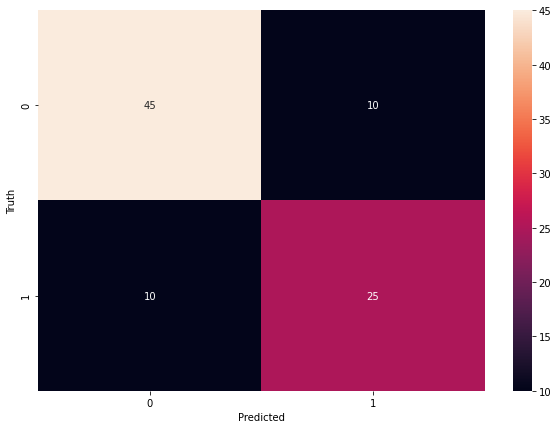

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)  # Using Heatmap confusion matrix visualization
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Tree Visualization

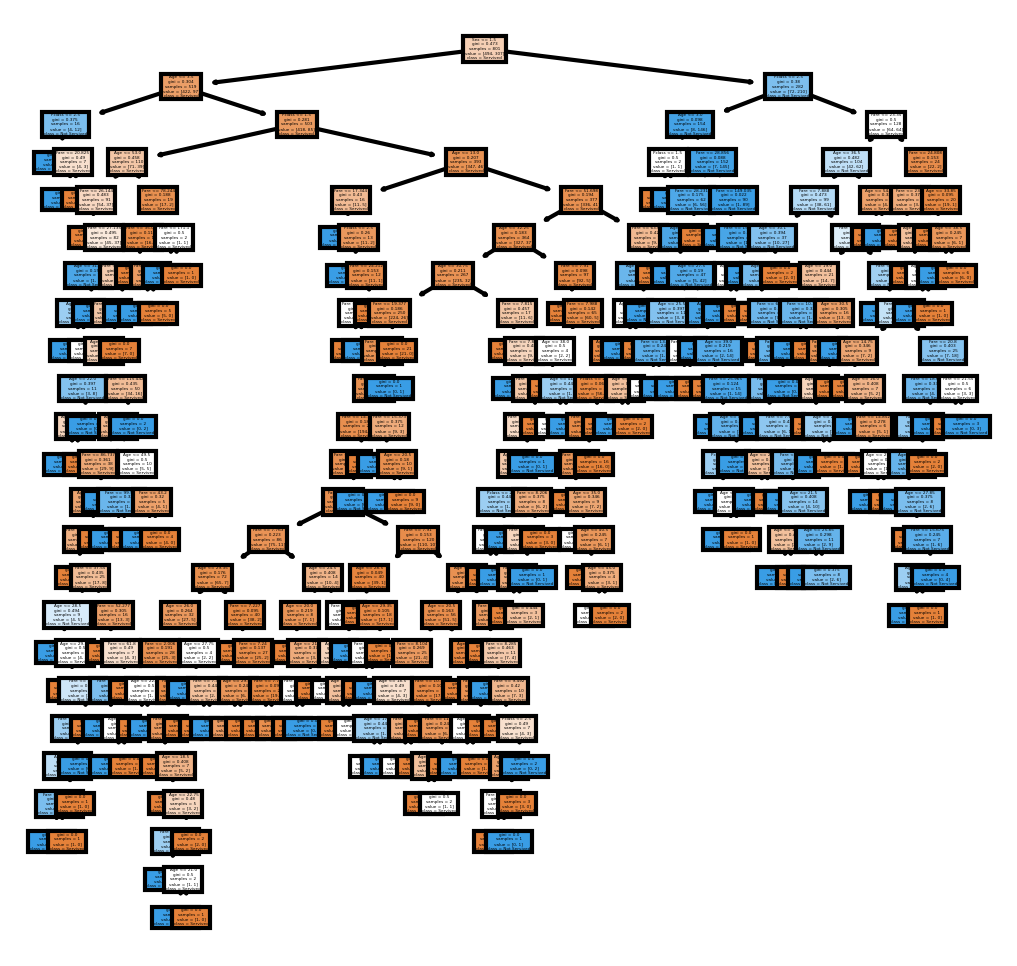

In [140]:
feature=['Pclass','Sex','Age','Fare']
clss=['Servived', 'Not Servived']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4 ,4), dpi=300)
tree.plot_tree(model,
               feature_names = feature, 
               class_names=clss,
               filled = True);
fig.savefig('titanic_tree.png')